# Import Packages

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
# Load the dataset
data = pd.read_csv('our_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           159256 non-null  int64  
 1   fasting blood sugar  159256 non-null  int64  
 2   Cholesterol          159256 non-null  int64  
 3   relaxation           159256 non-null  int64  
 4   serum creatinine     159256 non-null  float64
 5   dental caries        159256 non-null  int64  
 6   height(cm)           159256 non-null  int64  
 7   waist(cm)            159256 non-null  float64
 8   AST                  159256 non-null  int64  
 9   age                  159256 non-null  int64  
 10  Gtp                  159256 non-null  int64  
 11  smoking              159256 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 14.6 MB


No string variables; thus, no encoding needed.

# Data Visualization Univariate

In [3]:
data.head()

,Unnamed: 0,fasting blood sugar,Cholesterol,relaxation,serum creatinine,dental caries,height(cm),waist(cm),AST,age,Gtp,smoking
0,0,94,172,87,1.0,0,165,81.0,22,55,27,1
1,1,147,194,83,1.1,1,165,89.0,27,70,37,0
2,2,79,178,75,0.8,0,170,81.0,27,20,53,1
3,3,91,180,88,1.0,1,180,105.0,20,35,30,0
4,4,91,155,76,0.8,0,165,80.5,19,30,17,1


In [4]:
# Check for missing values
print(data.isnull().sum().sort_values(ascending=False))

Unnamed: 0             0
fasting blood sugar    0
Cholesterol            0
relaxation             0
serum creatinine       0
dental caries          0
height(cm)             0
waist(cm)              0
AST                    0
age                    0
Gtp                    0
smoking                0
dtype: int64


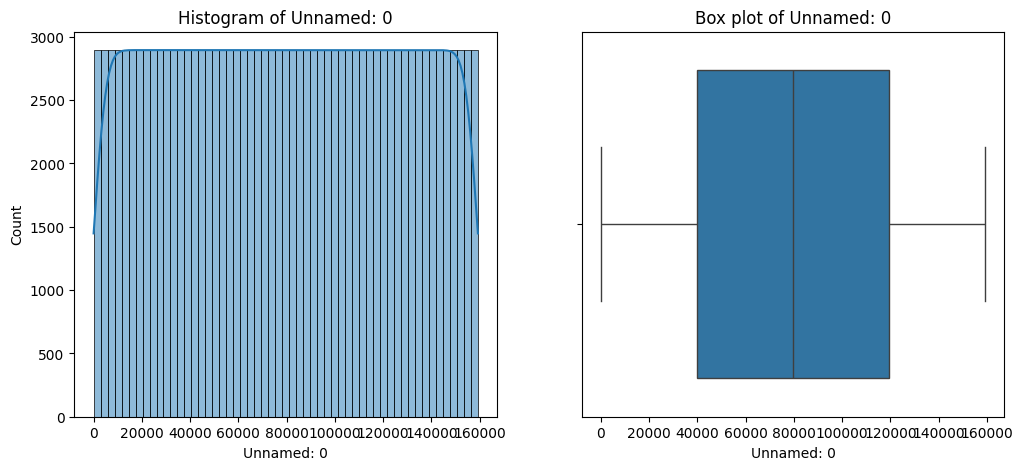

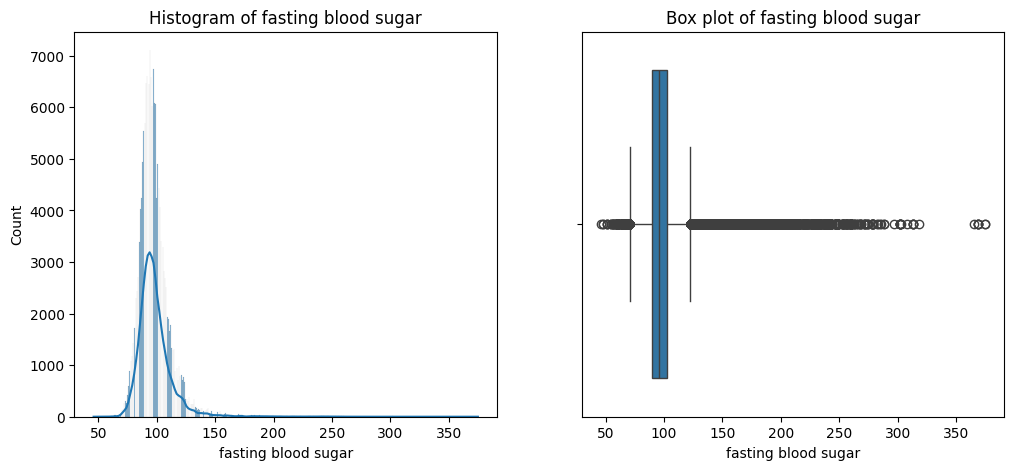

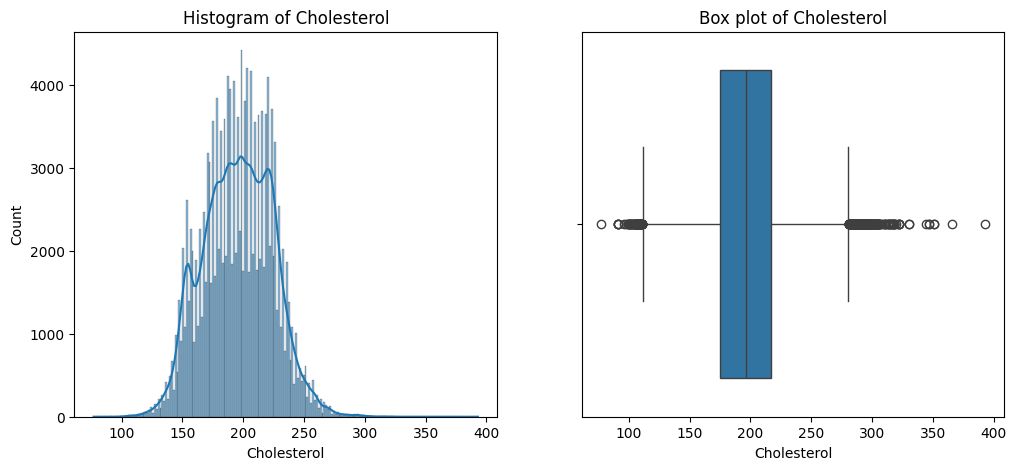

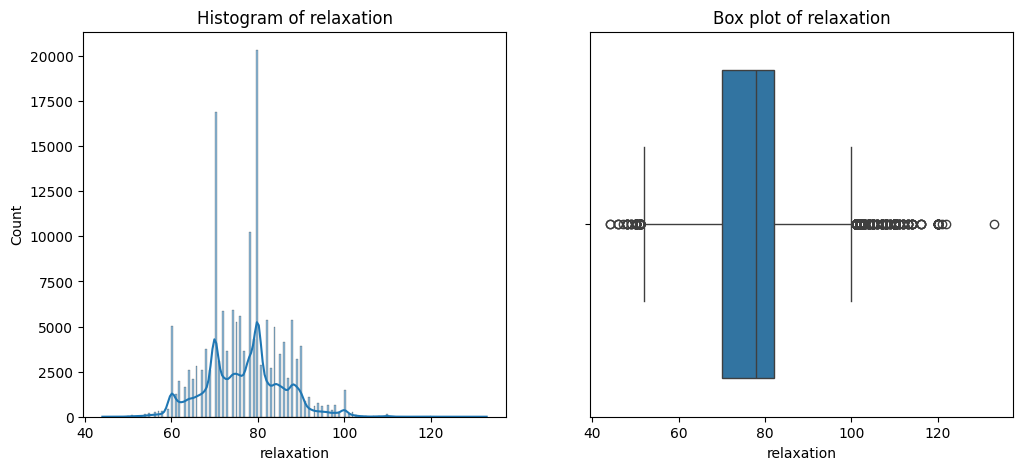

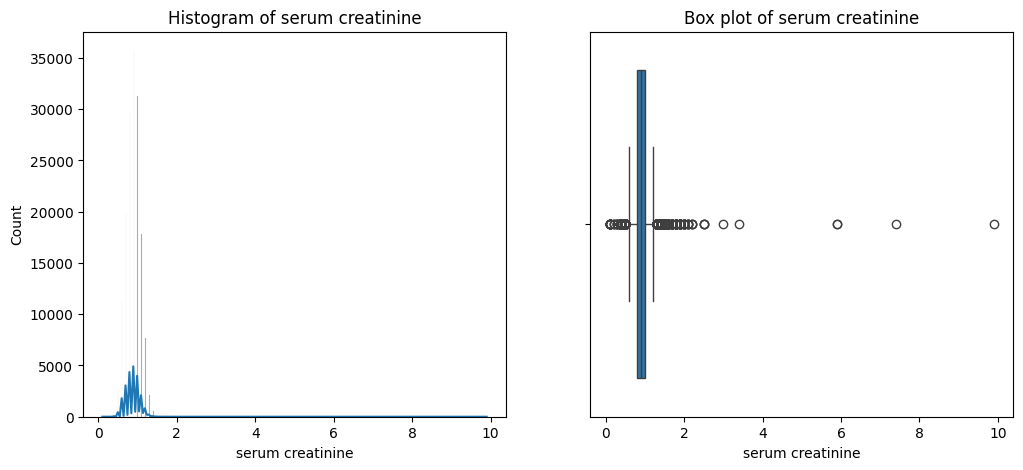

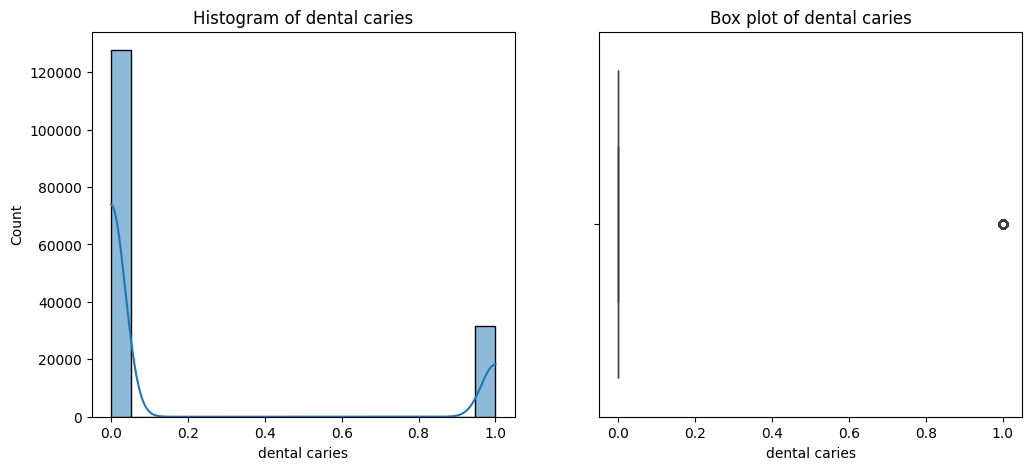

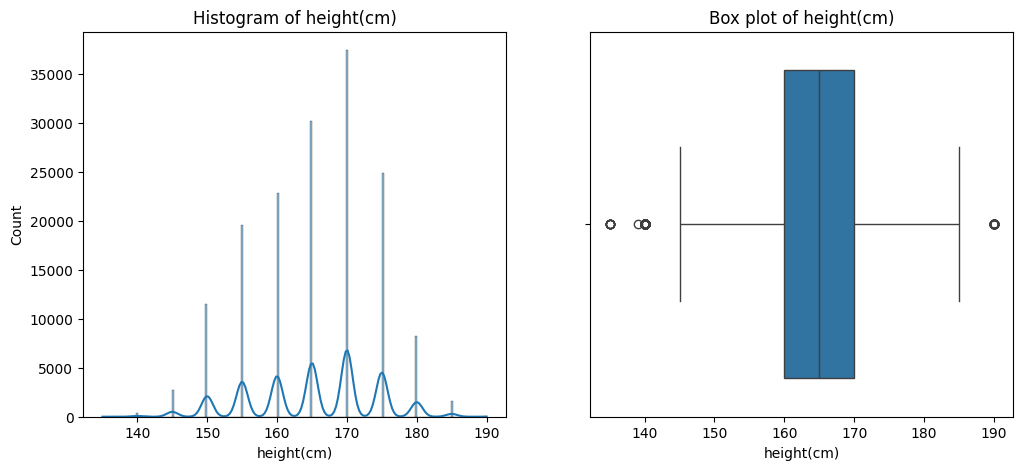

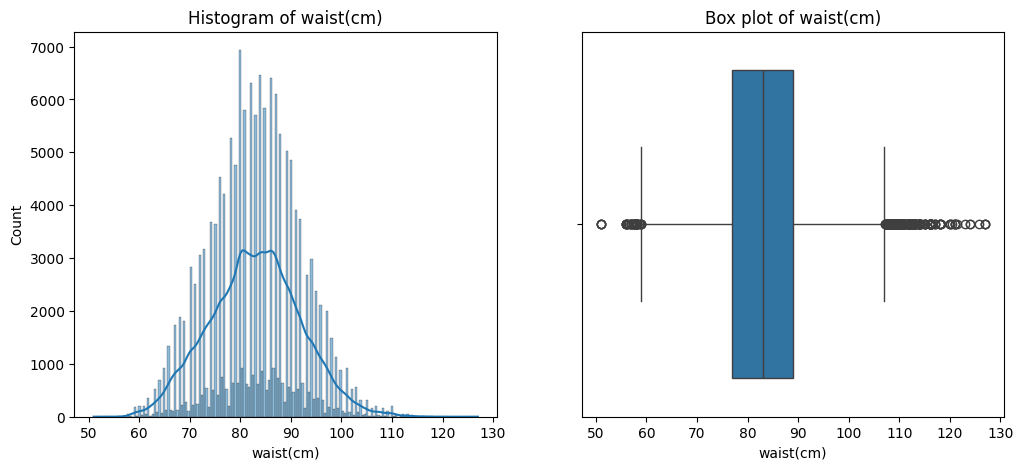

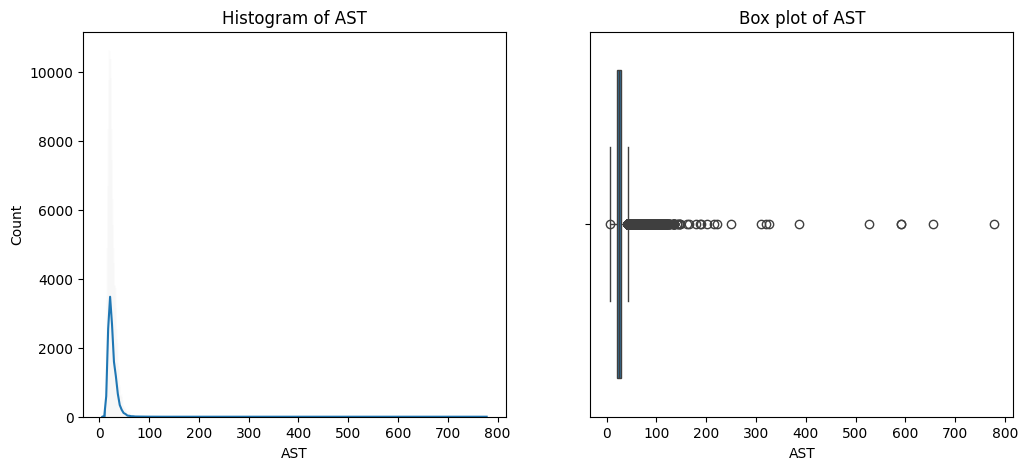

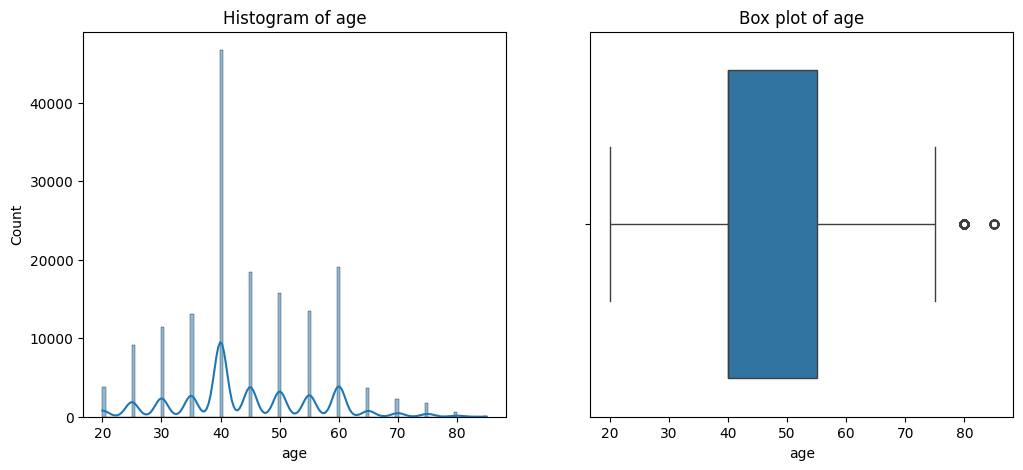

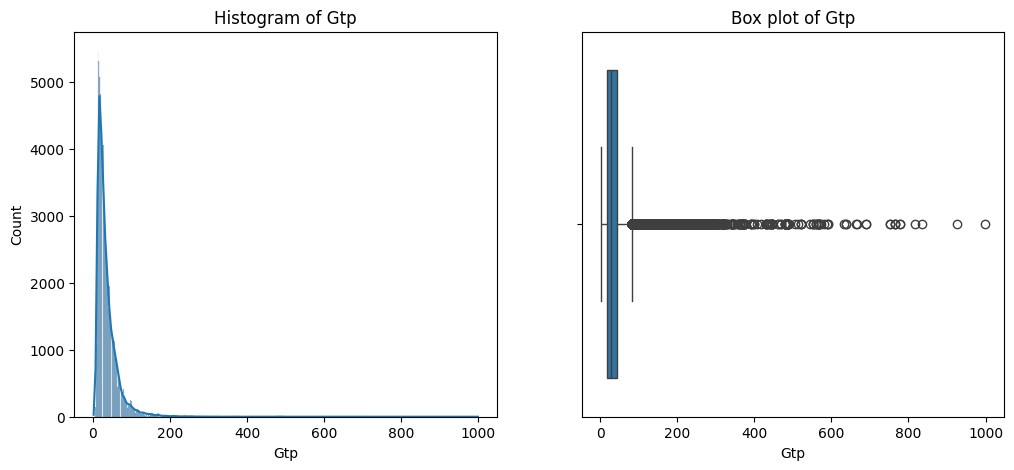

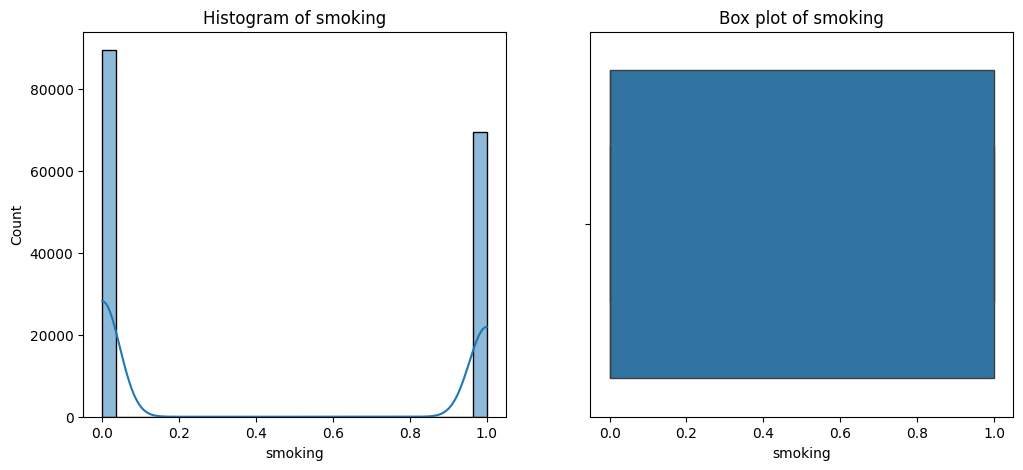

In [5]:
# Create histograms and box plots for each column
for column in data.columns:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
    
    plt.show()

Box plots and histograms are useful to see the ouliers and skewness of the data.

# Data Visualization Bivariate

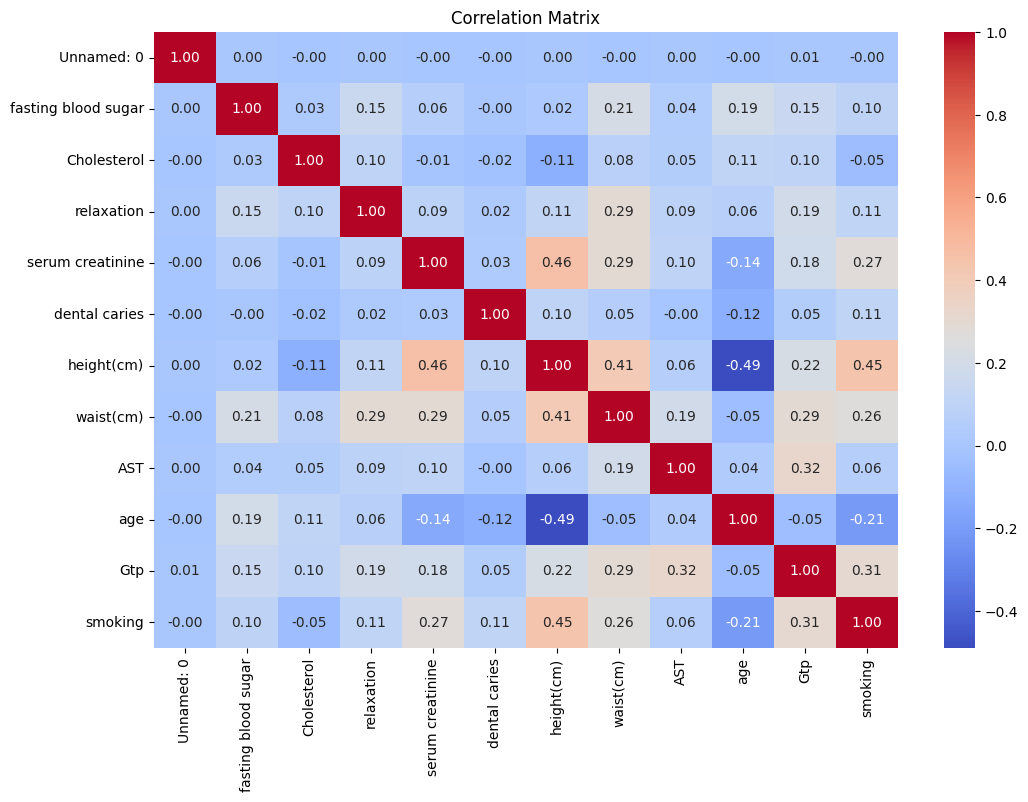

In [6]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

There is no high correlation between any two features.

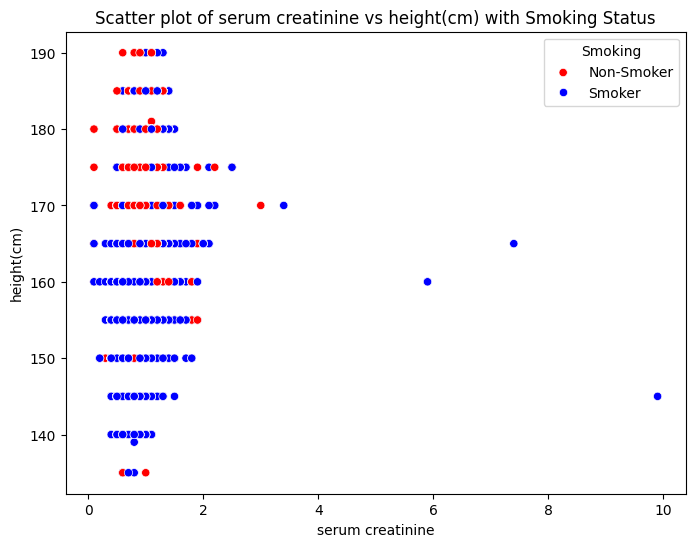

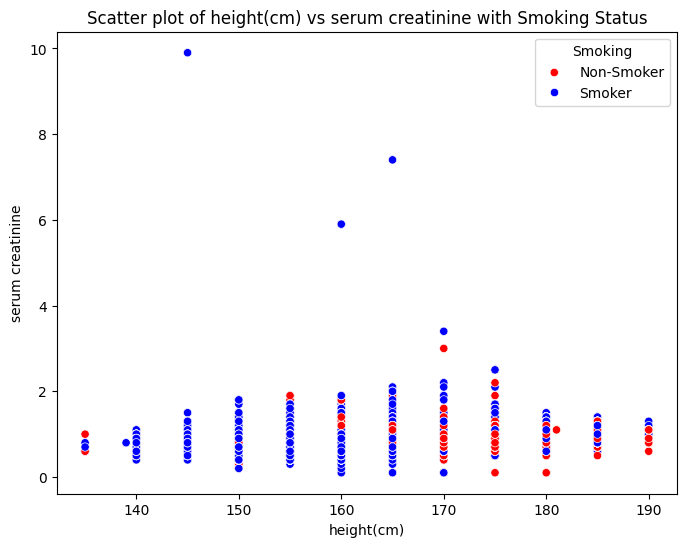

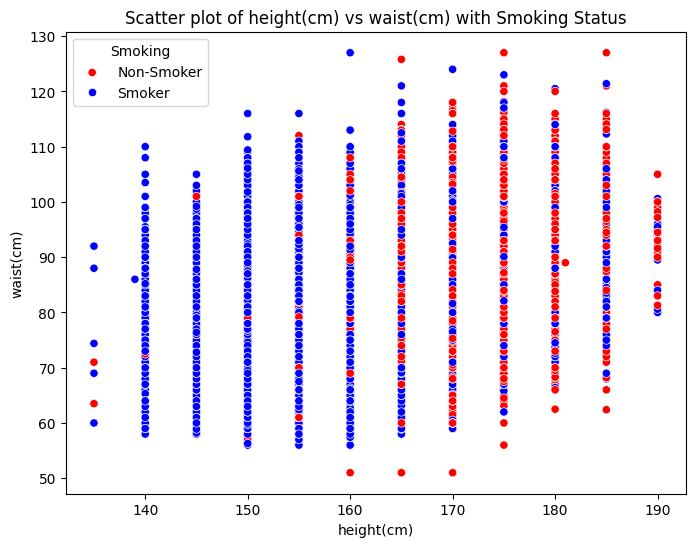

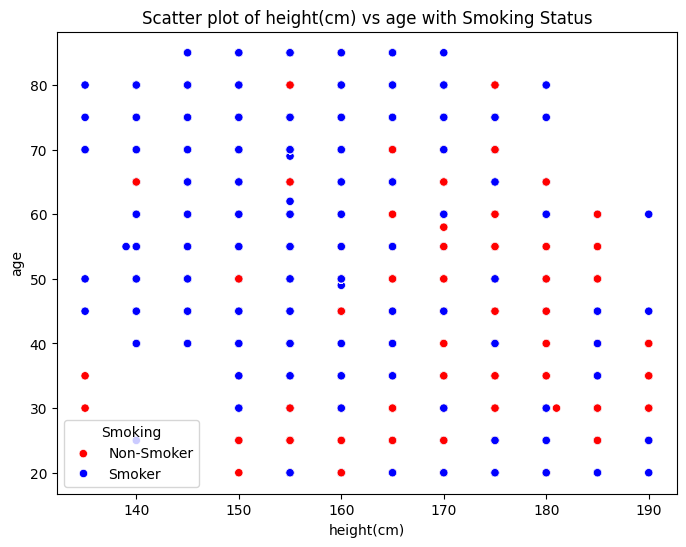

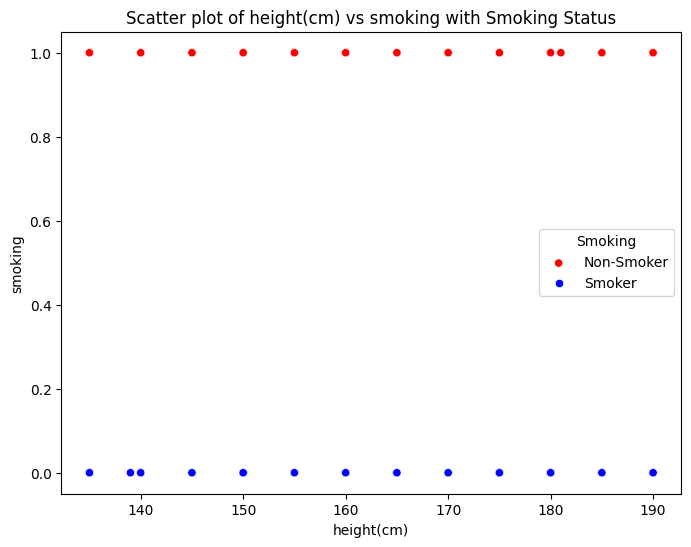

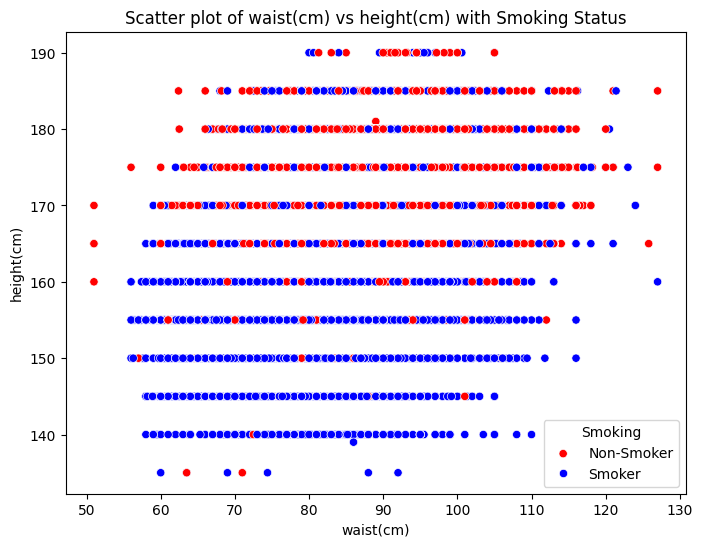

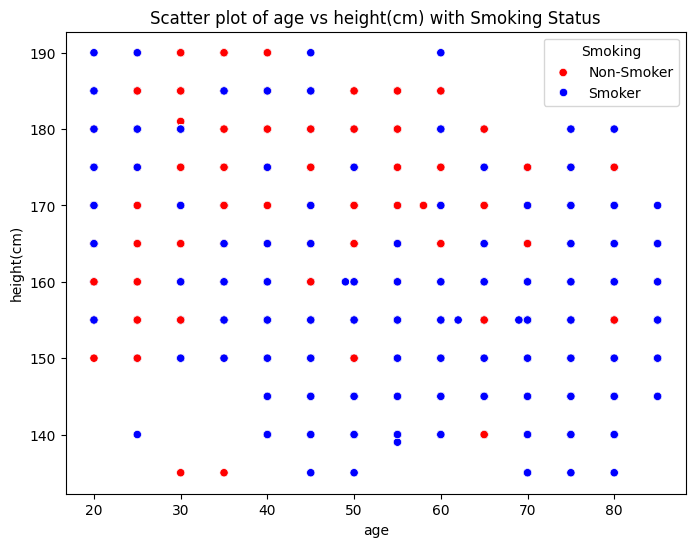

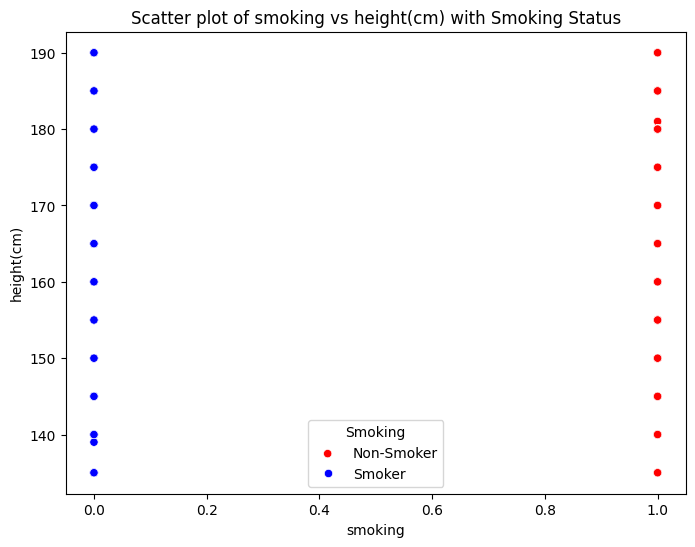

In [7]:
# Identify pairs of features with correlation higher than 0.4 or lower than -0.4
high_corr_pairs = correlation_matrix[(correlation_matrix > 0.4) | (correlation_matrix < -0.4)]

# Remove self-correlations
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]

# Get the pairs of features
pairs = high_corr_pairs.stack().index.tolist()

# Plot scatter plots for these pairs
for pair in pairs:
    feature1, feature2 = pair
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature1], y=data[feature2], hue=data['smoking'], palette={0: 'blue', 1: 'red'})
    plt.title(f'Scatter plot of {feature1} vs {feature2} with Smoking Status')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend(title='Smoking', labels=['Non-Smoker', 'Smoker'])
    plt.show()

no strong bivariat correlations noticed, the notable ones were not significant enough for feature engineering.

# Normalization for Multivariate 

In [8]:
# Normalize continuous features
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Data Visualization Multivariate

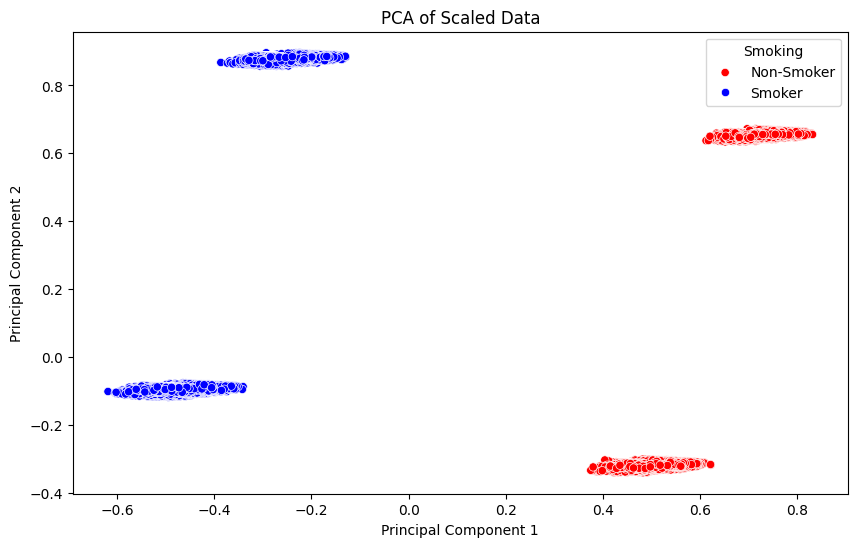

In [9]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['smoking'] = data_scaled['smoking'].values

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='smoking', data=pca_df, palette={0: 'blue', 1: 'red'})
plt.title('PCA of Scaled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Smoking', labels=['Non-Smoker', 'Smoker'])
plt.show()

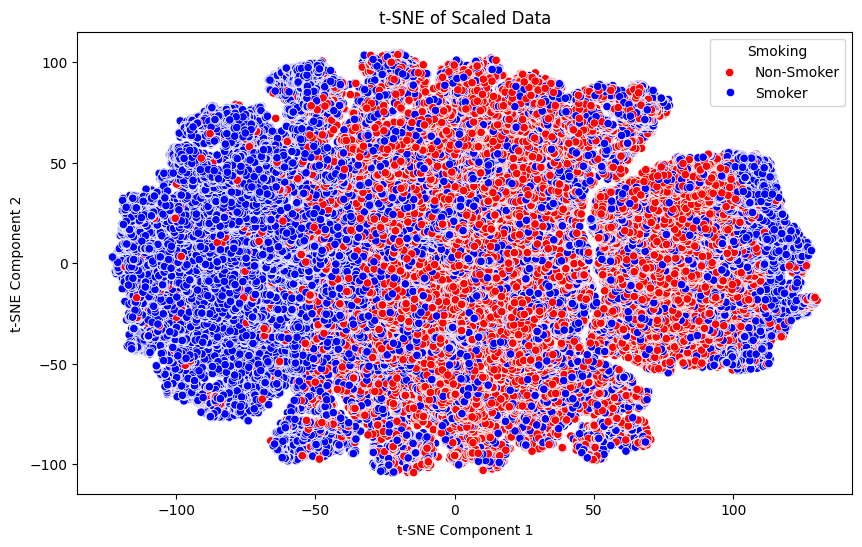

In [10]:
from sklearn.manifold import TSNE

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(data_scaled.drop(columns=['smoking']))

# Create a DataFrame with the t-SNE components
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])
tsne_df['smoking'] = data_scaled['smoking'].values

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='smoking', data=tsne_df, palette={0: 'blue', 1: 'red'})
plt.title('t-SNE of Scaled Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Smoking', labels=['Non-Smoker', 'Smoker'])
plt.show()